# Approximate equation for upper ocean temperature, T

$$ c_l \rho_l h \frac{\partial T}{\partial t} = F_{rad} - C_k \rho_a |V| C_{\rho}(T-T_a).$$

$R_{rad}$ constant and $T_a$ white noise:

$$\frac{\partial T}{\partial t} = \frac{q-T}{\tau},$$

with

$$\tau = \frac{c_l \rho_l h}{C_k \rho_a |V| C_{\rho}} = 360 \ days$$

$q$ varies randomly each 3 days.

Solving with finite differences:

$$T(t+1) = T(t) + \delta t \ \frac{q-T(t)}{360}$$

In [1]:
using PyPlot

INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/MacroTools.ji for module MacroTools.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/LaTeXStrings.ji for module LaTeXStrings.


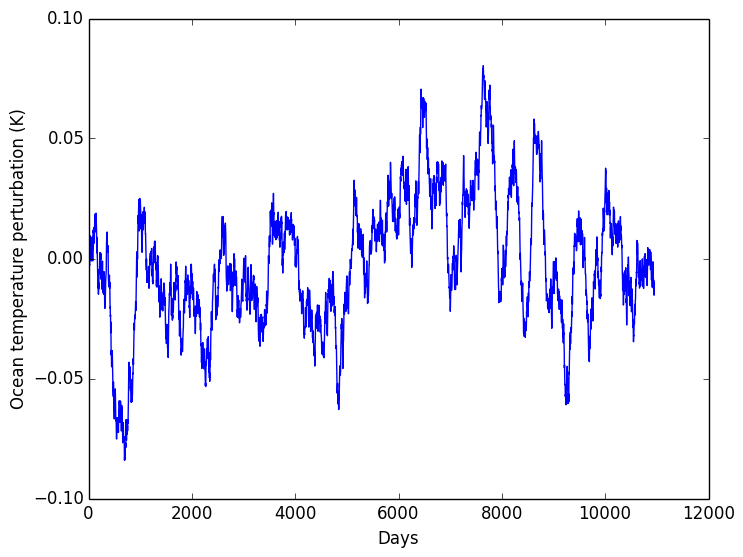

PyObject <matplotlib.text.Text object at 0x3121c03d0>

In [2]:
q = 0
T0 = 0.
T_ocean = [T0]
δt = 1
time = [0]

for i in 1:10950
    
    if i%3 == 0 
        
        q = rand(1)[1] - rand(1)[1]
        
    end
    
    T_nueva = T0 + δt *(q - T0)/360
    
    push!(T_ocean, T_nueva)
    push!(time, i)
    T0 = T_nueva
    
end

plot(time, T_ocean)
ylabel("Ocean temperature perturbation (K)")
xlabel("Days")    

In [3]:
?scale

search: scale scale! zscale yscale xscale autoscale isexecutable



```
scale(A, b)
scale(b, A)
```

Scale an array `A` by a scalar `b`, returning a new array.

If `A` is a matrix and `b` is a vector, then `scale(A,b)` scales each column `i` of `A` by `b[i]` (similar to `A*diagm(b)`), while `scale(b,A)` scales each row `i` of `A` by `b[i]` (similar to `diagm(b)*A`), returning a new array.

Note: for large `A`, `scale` can be much faster than `A .* b` or `b .* A`, due to the use of BLAS.


In [4]:
years = scale(time, 1/365)

10951-element Array{Float64,1}:
  0.0       
  0.00273973
  0.00547945
  0.00821918
  0.0109589 
  0.0136986 
  0.0164384 
  0.0191781 
  0.0219178 
  0.0246575 
  0.0273973 
  0.030137  
  0.0328767 
  ⋮         
 29.9699    
 29.9726    
 29.9753    
 29.9781    
 29.9808    
 29.9836    
 29.9863    
 29.989     
 29.9918    
 29.9945    
 29.9973    
 30.0       

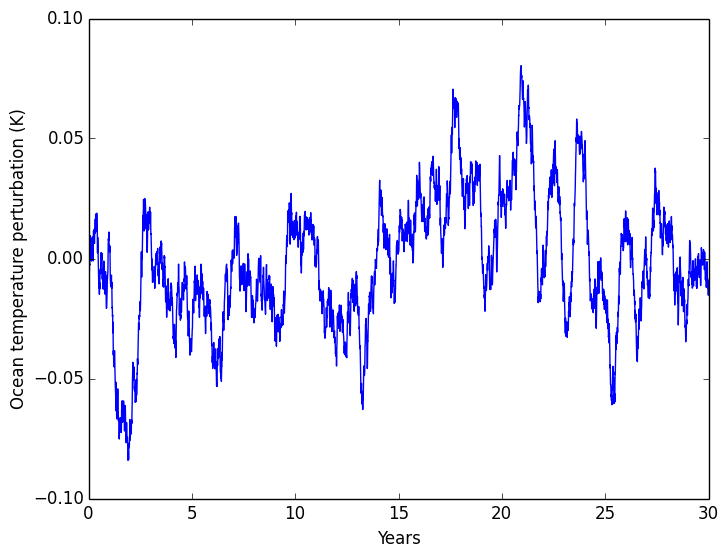

PyObject <matplotlib.text.Text object at 0x3121d1bd0>

In [5]:
plot(years, T_ocean)
ylabel("Ocean temperature perturbation (K)")
xlabel("Years")    